<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# Life Expectancy Modelling
## World Health Organisation 
> Project by Georgia Dias, Katie Kitchen, Conor Mckenna-Cuthbert, Ben Sarsfield and Joel Utoware. 


<p style="text-align:center;"> <img src = "https://images.unsplash.com/photo-1511174511562-5f7f18b874f8?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width = 700 /></p>

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

# use pip install geopy if necessary
from geopy.geocoders import Nominatim

# 1. EDA
## 1.1 Importing data

In [64]:
# Loading data
who = pd.read_csv('Life Expectancy Data.csv')
who.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [12]:
# Checking data types
who.dtypes

# Column Country and Region as object - will change during feature engineering stage.

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

## 1.2 Quality control: Numeric columns

In [13]:
# Cross-checking numerical columns 
who.describe()

# all checks consistent with data source

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [14]:
who.sum()

# all checks consistent with data source

Country                        TurkiyeSpainIndiaGuyanaIsraelCosta RicaRussian...
Region                         Middle EastEuropean UnionAsiaSouth AmericaMidd...
Year                                                                     5749480
Infant_deaths                                                            86961.9
Under_five_deaths                                                       122975.2
Adult_mortality                                                      550609.0845
Alcohol_consumption                                                   13807.0048
Hepatitis_B                                                               241414
Measles                                                                   221516
BMI                                                                      71694.3
Polio                                                                     247735
Diphtheria                                                                247082
Incidents_HIV               

> Copy of checks conducted on source data in Excel

<p style="text-align:center;">
<img src="https://i.ibb.co/SthZj1Q/excel1.png" width = 30000
     style="float: left; margin-right: 10px;" />
</p>

<p style="text-align:center;">
<img src="https://i.ibb.co/mFrvx1z/excel2.png" width = 30000
     style="float: left; margin-right: 10px;" />
</p>

## 1.3 Quality control: Non-numeric columns

In [15]:
# Checking for duplicates across countries and regions
who.Region.unique()

# all clean

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [16]:
who_countries = set(who.Country)
len(who_countries)

179

In [17]:
who_countries_strip = who.Country.str.lower().str.strip()
len(set(who_countries_strip))

# all clean

179

## 1.4 Null handling

In [18]:
# Checking for nulls
who.isnull().sum().sum()

0

In [19]:
# Checking for 0s
who1 = who.copy()
who1.replace(0 , np.nan, inplace = True) ## converting the 0's to nulls
who1.isnull().sum()

# All values explainable - binary type columns and lack of alcohol consumption

Country                           0
Region                            0
Year                              0
Infant_deaths                     0
Under_five_deaths                 0
Adult_mortality                   0
Alcohol_consumption              38
Hepatitis_B                       0
Measles                           0
BMI                               0
Polio                             0
Diphtheria                        0
Incidents_HIV                     0
GDP_per_capita                    0
Population_mln                    0
Thinness_ten_nineteen_years       0
Thinness_five_nine_years          0
Schooling                         0
Economy_status_Developed       2272
Economy_status_Developing       592
Life_expectancy                   0
dtype: int64

## 1.5 Visualisations

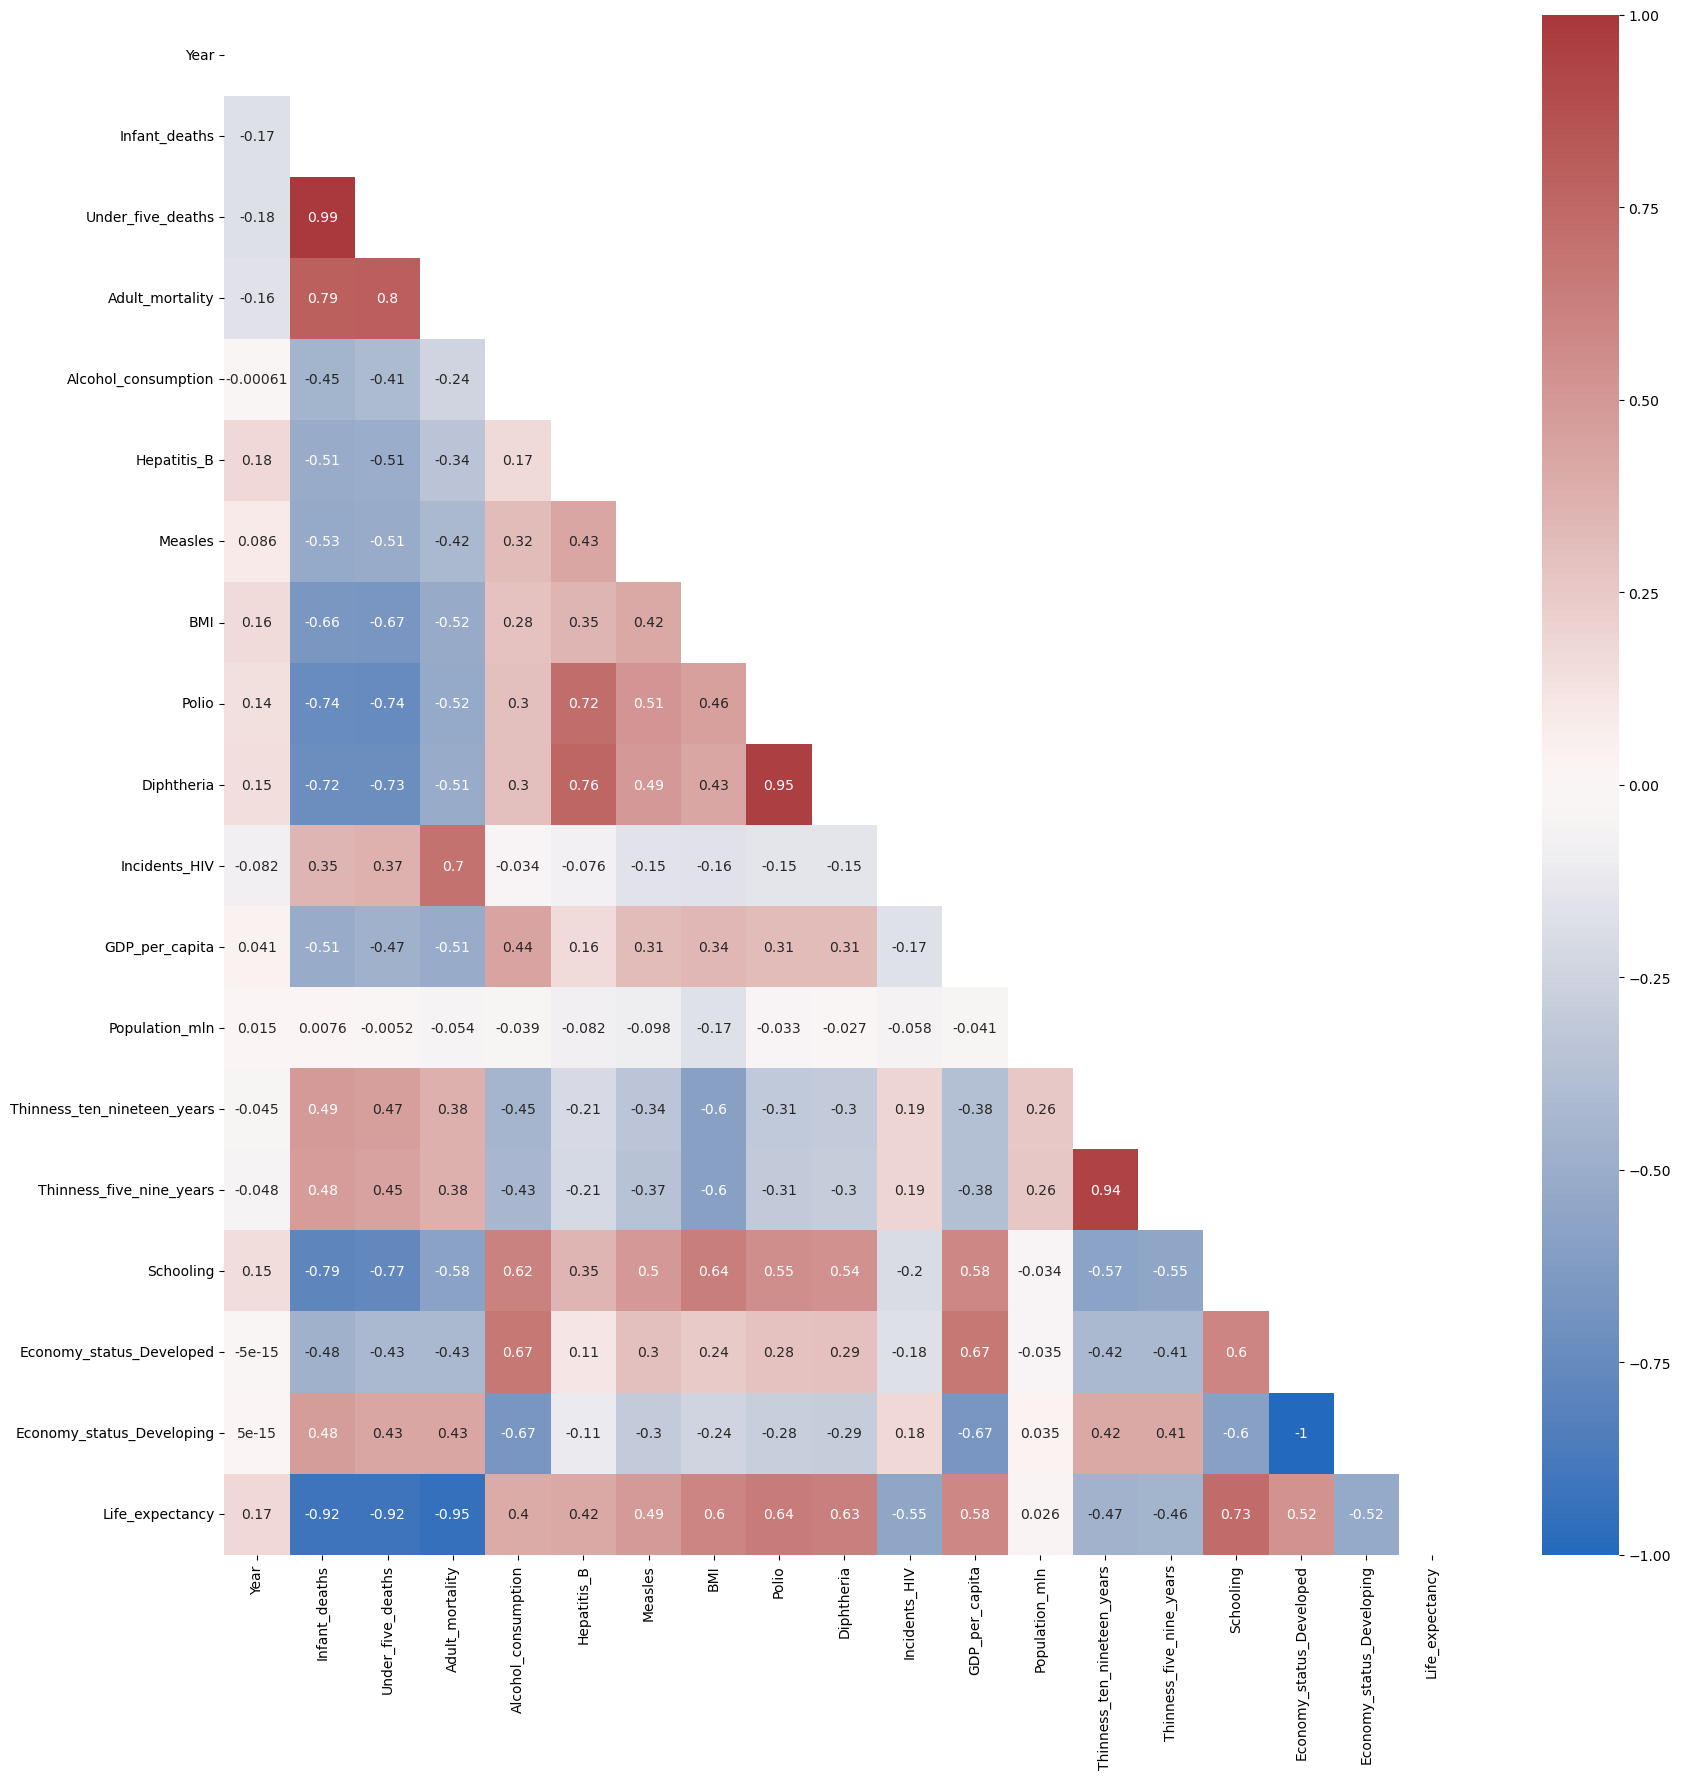

In [20]:
# Plotting correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(who.corr(numeric_only=True), 
            annot = True,
            vmin=-1,
            vmax=1,
            cmap ="vlag",
            mask = np.triu(who.corr(numeric_only=True)))

plt.show()

We can see here a strong correlation between the features of **Infant_deaths**, **Under_five_deaths** and **Adult_mortality** with the target of Life_expectancy, all in the region of **> |0.9|**.
* Other notable corelations with Life_expectancy include Schooling (0.73), BMI, Polio and Diptheria (all > |0.6|).
* We can also note strong corellations between multiple features, likely to cause multicollinearity in out model.

Let's look at our corellations in the form of a pairplot.

C:\Users\katie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


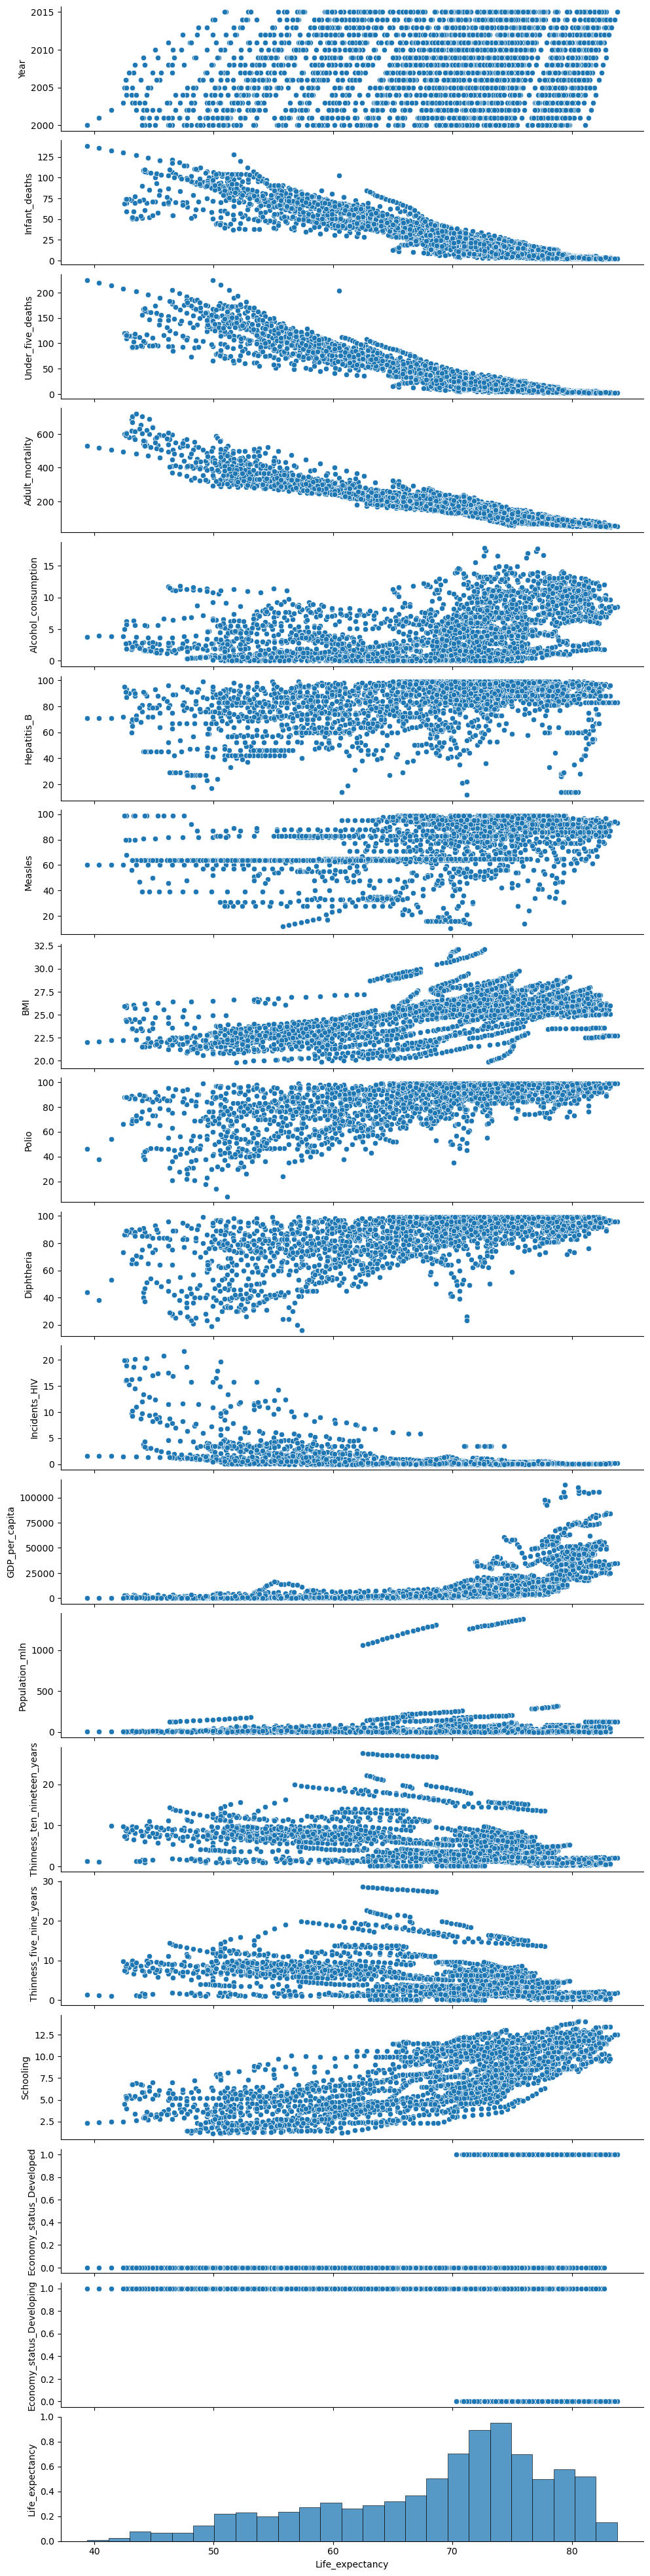

In [21]:
# Pairplot of Life_expectancy against the other columns 
figure=sns.pairplot(who,
             x_vars='Life_expectancy',
            )
figure.fig.set_size_inches(15,40)
plt.show()

# 2. Train Test Split

In [22]:
# Splitting features and target
feature_cols = list(who.columns)
feature_cols.remove('Life_expectancy')

X = who[feature_cols] # Features/Independent variables
y = who['Life_expectancy'] # Target/Label/Dependent variables

# Using sklearn to split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [23]:
# Checking split
min(X_train.index == y_train.index)
min(X_test.index == y_test.index)

True

In [24]:
X_train.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
1963,Tunisia,Africa,2013,15.0,17.5,94.3265,1.40,98,98,26.1,98,98,0.04,4016,10.95,6.4,6.3,6.8,0,1
2841,Central African Republic,Africa,2010,99.0,145.0,474.0650,1.96,45,64,22.4,46,45,1.90,532,4.39,9.0,8.9,3.6,0,1
191,Panama,Central America and Caribbean,2007,18.5,21.7,125.1955,5.46,85,83,26.2,84,85,0.40,9169,3.45,2.1,2.0,9.2,0,1
2722,Switzerland,Rest of Europe,2004,4.4,5.2,67.6140,10.54,88,71,24.9,95,93,0.09,75113,7.39,0.6,0.4,11.9,1,0
376,Central African Republic,Africa,2001,109.2,167.4,541.3310,1.67,45,64,21.6,40,40,3.88,470,3.72,1.4,1.4,2.9,0,1


# 3. Feature Engineering

## 3.1 One Hot Encoding

In [25]:
who_copy = who.copy()
who_copy.dtypes

# Only two columns in object format - Region and Country
# Try encoding Region, and ignoring Country

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [26]:
who_copy = pd.get_dummies(who_copy, columns = ['Region'], drop_first = True, prefix = 'Region',dtype = int)

In [27]:
who_copy.head()

,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Economy_status_Developing,Life_expectancy,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Turkiye,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,...,1,76.5,0,0,0,1,0,0,0,0
1,Spain,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,...,0,82.8,0,0,1,0,0,0,0,0
2,India,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,...,1,65.4,1,0,0,0,0,0,0,0
3,Guyana,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,...,1,67.0,0,0,0,0,0,0,0,1
4,Israel,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,...,0,81.7,0,0,0,1,0,0,0,0


## 3.2 Advanced One Hot Encoding

In [28]:
def geolocation(df):
    geolocator = Nominatim(user_agent="my_geocoder")

    Countries = df['Country'].unique()
    arr = []

    for i,k in enumerate(Countries):
        j = k
        if j == 'Congo, Rep.':
            j = 'Congo Republic'
        elif j == 'Iran, Islamic Rep.':
            j = 'Iran'
        elif j == 'Egypt, Arab Rep.':
            j = 'Egypt'
        elif j == 'Congo, Dem. Rep.':
            j = 'Democratic Republic of the Congo'
        elif j == 'Yemen, Rep.':
            j = 'Yemen'
        elif j == 'Micronesia, Fed. Sts.':
            j = 'Micronesia'

        location = geolocator.geocode(j)   
        arr.append([k,location.latitude,location.longitude])
        
    return arr

locations = geolocation(who_copy)

In [29]:
def join_geo(df,arr):
    temp = pd.DataFrame(arr,columns = ['Country','Latitude','Longitude'])
    temp.set_index('Country',inplace = True)
    
    df = df.join(temp, on = 'Country')
    
    return df

In [30]:
def populate_latlong(df):
    for i in ['Region_Asia','Region_Central America and Caribbean', 'Region_European Union',
              'Region_Middle East', 'Region_North America', 'Region_Oceania','Region_Rest of Europe', 
              'Region_South America']:
        df[i+'_Lat'] = df[i]*df['Latitude']
        df[i+'_Long'] = df[i]*df['Longitude']

    return df

## 3.3 Testing exponentials/ logs

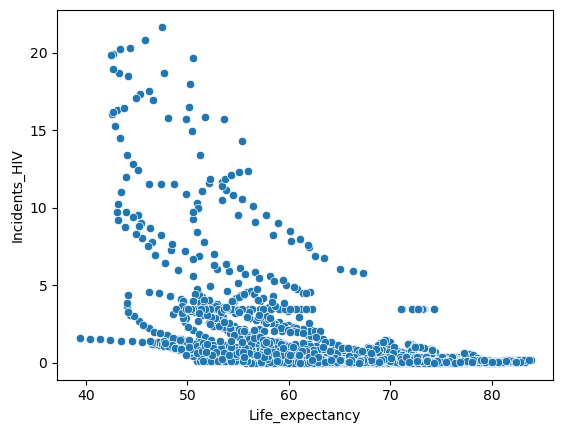

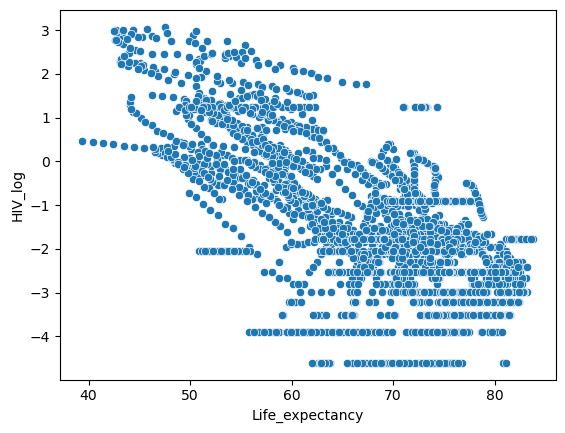

In [33]:
who_copy['HIV_log'] =  np.log(who_copy['Incidents_HIV'])

sns.scatterplot(data = who_copy,
                y= 'Incidents_HIV',
                x = 'Life_expectancy')
plt.show()
sns.scatterplot(data = who_copy, y = 'HIV_log', x = 'Life_expectancy')
plt.show()

# We can see a potentially clearer linear relationship using the HIV_log column.

In [32]:
## Testing corellations
combined = list(zip(who_copy.HIV_log, who.Incidents_HIV, who.Life_expectancy))

## Create a data frame
df = pd.DataFrame(combined, columns=['HIV_log' , 'Incidents_HIV', 'Life_expectancy'])

df.corr(numeric_only=True)

,HIV_log,Incidents_HIV,Life_expectancy
HIV_log,1.000000,0.693608,-0.686664
Incidents_HIV,0.693608,1.000000,-0.553027
Life_expectancy,-0.686664,-0.553027,1.000000


**HIV_log** has a stronger correlation with Life_expectancy than Incidents_HIV does - increasing from **|0.55|** to **|0.69|**. This is worth using in our model.

## 3.4 Scaling

When exploring the data we noticed a large number of **outliers** in the GDP_per_capita column, as outlined in the below boxplot:

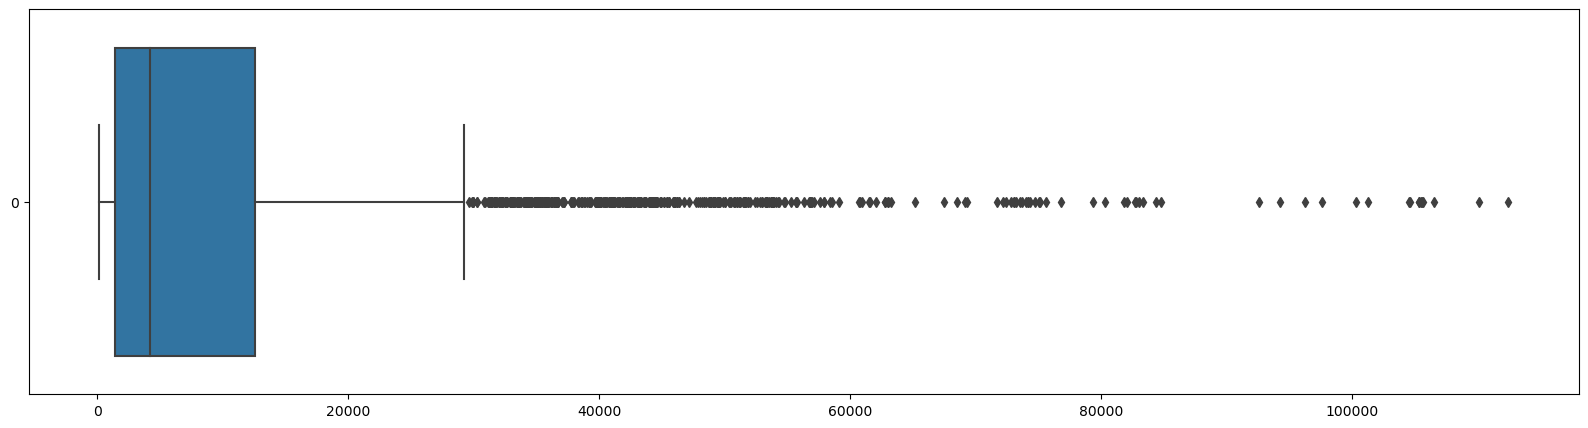

In [72]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = who['GDP_per_capita'],
            orient = 'h')
plt.show()

To mitigate the effects of these outliers, we applied a **robust scaler** on the feature.

In [34]:
# Create scaling function to mitigate the effects of outliers in the data.
def robust(array):
    Q2 = np.median(array) 
    Q1 = np.percentile(array, 25) 
    Q3 = np.percentile(array, 75) 

    ''' Return scaled data '''
    return [(x - Q2)/(Q3-Q1) for x in array]

who_copy['robust_GDP'] = robust(who_copy['GDP_per_capita'])
who_copy.robust_GDP.describe()

count    2864.000000
mean        0.657370
std         1.520008
min        -0.365219
25%        -0.251430
50%         0.000000
75%         0.748570
max         9.711747
Name: robust_GDP, dtype: float64

In [73]:
# See values of Q1, Q2 and Q3 for use in model function later
who.GDP_per_capita.describe()

count      2864.000000
mean      11540.924930
std       16934.788931
min         148.000000
25%        1415.750000
50%        4217.000000
75%       12557.000000
max      112418.000000
Name: GDP_per_capita, dtype: float64

## 3.5 Making a combined function

In [36]:
def feature_eng(df,locations):
        ''' feature engineering fuction for who dataframe'''
        df = df.copy() # always start with a local copy
        df = join_geo(df,locations)
        df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype = int)
        df = populate_latlong(df)
        df['HIV_log'] =  np.log(df['Incidents_HIV']) # Using log to see linear relationship
        df['robust_GDP'] = robust(df['GDP_per_capita'])
        df = sm.add_constant(df) # add constant column so stats can find the intersect
        return df

In [37]:
X_train_fe = feature_eng(X_train,locations)
X_train_fe.head()

,const,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Region_North America_Lat,Region_North America_Long,Region_Oceania_Lat,Region_Oceania_Long,Region_Rest of Europe_Lat,Region_Rest of Europe_Long,Region_South America_Lat,Region_South America_Long,HIV_log,robust_GDP
1963,1.0,Tunisia,2013,15.0,17.5,94.3265,1.40,98,98,26.1,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-3.218876,-0.019561
2841,1.0,Central African Republic,2010,99.0,145.0,474.0650,1.96,45,64,22.4,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.641854,-0.336533
191,1.0,Panama,2007,18.5,21.7,125.1955,5.46,85,83,26.2,...,0.0,-0.0,0.0,-0.0,0.000000,-0.000000,0.0,-0.0,-0.916291,0.449256
2722,1.0,Switzerland,2004,4.4,5.2,67.6140,10.54,88,71,24.9,...,0.0,0.0,0.0,0.0,46.798562,8.231974,0.0,0.0,-2.407946,6.448801
376,1.0,Central African Republic,2001,109.2,167.4,541.3310,1.67,45,64,21.6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.355835,-0.342173


# 4. General Model - Standard OHE

## 4.1 Model Creation

In [38]:
# Let's look at what columns we have to work with.
X_train_fe.columns

Index(['const', 'Country', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Latitude', 'Longitude', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America', 'Region_Asia_Lat',
       'Region_Asia_Long', 'Region_Central America and Caribbean_Lat',
       'Region_Central America and Caribbean_Long',
       'Region_European Union_Lat', 'Region_European Union_Long',
       'Region_Middle East_Lat', 'Region_Middle East_Long',
       'Region_North America_Lat', 'Region_North America_Long',
       'Region_Oceania_Lat', 'Region_Ocea

In [39]:
# Create an initial model using all useful columns (Country removed). P_values > 0.05 removed.
feature_cols_0 = ['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Hepatitis_B',
       'BMI', 'Schooling', 'Economy_status_Developed', 
       'Region_Central America and Caribbean', 'Region_European Union', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America', 'HIV_log',
       'robust_GDP']

Here we have systematically removed all columns with P-values > 0.05, in order of size. This allowed us to preserve as much signal in our model as possible, while reducing the noise. The following model is optimised to give the best rmse, including all relevant features.

In [40]:
# Fit model on data and product summary stats
lin_reg_0 = sm.OLS(y_train, X_train_fe[feature_cols_0])
results_0 = lin_reg_0.fit()

## 4.2 Evaluate on train

In [41]:
results_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     9340.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:32:06   Log-Likelihood:                -3637.8
No. Observations:                2291   AIC:                             7308.
Df Residuals:                    2275   BIC:                             7399.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   12.5352     11.284      1.111      0.267      -9.592      34.663
Year                                     0.0350      0.006      6.211      0.000       0.024       0.046
Infant_deaths                           -0.0530      0.006     -8.799      0.000      -0.065      -0.041
Under_five_deaths                       -0.0562      0.004    -15.150      0.000      -0.064      -0.049
Adult_mortality                         -0.0434      0.001    -85.867      0.000      -0.044      -0.042
Hepatitis_B                             -0.0084      0.002     -4.483      0.000      -0.012      -0.005
BMI                                     -0.1011      0.018     -5.731      0.000      -0.136      -0.067
Schooling                                0.1086      0.016      6.675      0.000       0.077       0.141
Economy_status_Developed                 2.5593      0.154     16.618      0.000       2.257       2.861
Region_Central America and Caribbean     1.7167      0.092     18.593      0.000       1.536       1.898
Region_European Union                   -1.1785      0.143     -8.250      0.000      -1.459      -0.898
Region_Oceania                          -1.1752      0.118     -9.921      0.000      -1.408      -0.943
Region_Rest of Europe                   -0.2104      0.105     -1.998      0.046      -0.417      -0.004
Region_South America                     1.4934      0.110     13.626      0.000       1.278       1.708
HIV_log                                 -0.1100      0.026     -4.161      0.000      -0.162      -0.058
robust_GDP                               0.2679      0.026     10.155      0.000       0.216       0.320
==============================================================================
Omnibus:                       13.112   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.284
Skew:                           0.186   Prob(JB):                      0.00130
Kurtosis:                       2.970   Cond. No.                     9.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
## Let's look at the predictions from this model
y_pred = results_0.predict(X_train_fe[feature_cols_0])

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

1.1840444947204043


## 4.3 Evaluate on test

In [43]:
X_test_fe = feature_eng(X_test,locations)
X_test_fe_0 = X_test_fe[feature_cols_0] 
y_test_pred_0 = results_0.predict(X_test_fe_0)
rmse0 = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_0)
print(rmse0) 

1.2552826068343463


For this model, we can see there is a slight overfitting of the data, evident in our marginally different RMSE values, going from **1.184 to 1.255**.

# 5 Advanced Model - Advanced OHE

## 5.1 Swapping binary Region features for Lat/Long

In [66]:
# Change Region features used in General Model to Lat/Long  measurements.
feature_cols_2 = ['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Hepatitis_B',
       'BMI', 'Schooling', 'Economy_status_Developed', 
       'HIV_log', 'robust_GDP', 'Region_Asia_Long',
       'Region_Central America and Caribbean_Lat',
       'Region_Central America and Caribbean_Long',
       'Region_European Union_Lat', 'Region_European Union_Long',
       'Region_Middle East_Lat', 'Region_Middle East_Long',
       'Region_North America_Lat', 'Region_North America_Long',
       'Region_Oceania_Lat','Region_South America_Lat', 'Region_South America_Long']

In [68]:
lin_reg_2 = sm.OLS(y_train, X_train_fe[feature_cols_2])
results_2 = lin_reg_2.fit()

## 5.2 Evaluate on train

In [67]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6875.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:05:44   Log-Likelihood:                -3547.9
No. Observations:                2291   AIC:                             7142.
Df Residuals:                    2268   BIC:                             7274.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         3.0330     10.872      0.279      0.780     -18.287      24.353
Year                                          0.0402      0.005      7.415      0.000       0.030       0.051
Infant_deaths                                -0.0574      0.006     -9.859      0.000      -0.069      -0.046
Under_five_deaths                            -0.0527      0.004    -14.523      0.000      -0.060      -0.046
Adult_mortality                              -0.0426      0.000    -85.718      0.000      -0.044      -0.042
Hepatitis_B                                  -0.0075      0.002     -3.951      0.000      -0.011      -0.004
BMI                                          -0.1732      0.019     -9.013      0.000      -0.211      -0.136
Schooling                                     0.1417      0.016      8.971      0.000       0.111       0.173
Economy_status_Developed                      2.5707      0.154     16.686      0.000       2.269       2.873
HIV_log                                      -0.0988      0.025     -3.938      0.000      -0.148      -0.050
robust_GDP                                    0.2990      0.026     11.441      0.000       0.248       0.350
Region_Asia_Long                              0.0033      0.001      3.580      0.000       0.001       0.005
Region_Central America and Caribbean_Lat     -0.0336      0.009     -3.575      0.000      -0.052      -0.015
Region_Central America and Caribbean_Long    -0.0376      0.002    -16.027      0.000      -0.042      -0.033
Region_European Union_Lat                    -0.0137      0.003     -4.643      0.000      -0.020      -0.008
Region_European Union_Long                   -0.0243      0.003     -7.264      0.000      -0.031      -0.018
Region_Middle East_Lat                        0.0189      0.003      5.510      0.000       0.012       0.026
Region_Middle East_Long                      -0.0061      0.002     -3.602      0.000      -0.009      -0.003
Region_North America_Lat                     -0.0635      0.013     -4.947      0.000      -0.089      -0.038
Region_North America_Long                    -0.0309      0.005     -5.657      0.000      -0.042      -0.020
Region_Oceania_Lat                            0.0204      0.006      3.553      0.000       0.009       0.032
Region_South America_Lat                     -0.0185      0.006     -3.171      0.002      -0.030      -0.007
Region_South America_Long                    -0.0261      0.002    -13.778      0.000      -0.030      -0.022
==============================================================================
Omnibus:                        6.375   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.041   Jarque-Bera (JB):        

In [46]:
y_pred = results_2.predict(X_train_fe[feature_cols_2])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(rmse)



1.1384792474157595


Compared to the previous model, the statistics are similar, however the RMSE is **0.05** lower at **1.138**

## Evaluate on test

In [47]:
X_test_2 = X_test_fe[feature_cols_2] 
y_test_pred_2 = results_2.predict(X_test_2)
rmse2 = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_2)
print(rmse2) 

1.1976433480710535


Interestingly the RMSE on the test data is **1.198** almost **0.06** lower than the previous model. Even with the addition of more information we see less overtraining, signifying that these additions provide signal. 
This is a good start, but we need a third model to tackle the two outstanding issues:
* Reduce the **condition number** in order to make the model more robust
* Account for ethical concerns in the data.

We will make a third, more minimalist model, optimising rmse again, while aiming for a lower conditon number and using only **non-sensitive data**.

# 6 Minimalist Model 


## 6.1 Model tuning - reducing condition number

In order to make our model less collinear, and with less features, we will start by using a variance inflation factor function to select a set of columns for us.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

cols = ['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Hepatitis_B', 'BMI', 'Incidents_HIV','Thinness_ten_nineteen_years',
       'Schooling','Region_Central America and Caribbean', 'Region_European Union',
       'Region_Oceania','Region_South America', 'HIV_log', 'robust_GDP']

## We can create an indexed list (a series) where we list the VIF of each of the columns.
pd.Series([variance_inflation_factor(X_train_fe[cols].values, i) for i in range(X_train_fe[cols].shape[1])], index = X_train_fe[cols].columns)

const                                   205348.650049
Year                                         1.089900
Infant_deaths                               43.430243
Under_five_deaths                           43.343347
Adult_mortality                              7.836557
Hepatitis_B                                  1.479533
BMI                                          2.743888
Incidents_HIV                                3.214528
Thinness_ten_nineteen_years                  1.984324
Schooling                                    3.980955
Region_Central America and Caribbean         1.348131
Region_European Union                        1.531344
Region_Oceania                               1.279880
Region_South America                         1.229764
HIV_log                                      3.103396
robust_GDP                                   2.056875
dtype: float64

In [62]:
## This runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max. 
## It then keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

> Citation: Function taken from _Digital Futures_ workbook, sourced originally via _Stack Overflow_.

In [50]:
calculate_vif(X_train_fe[feature_cols_0])

dropping 'const' at index: 0
dropping 'Year' at index: 0
dropping 'Infant_deaths' at index: 0
dropping 'BMI' at index: 3
dropping 'Schooling' at index: 3
dropping 'Adult_mortality' at index: 1
dropping 'Economy_status_Developed' at index: 2
dropping 'Hepatitis_B' at index: 1
Remaining variables:
Index(['Under_five_deaths', 'Region_Central America and Caribbean',
       'Region_European Union', 'Region_Oceania', 'Region_Rest of Europe',
       'Region_South America', 'HIV_log', 'robust_GDP'],
      dtype='object')


,Under_five_deaths,Region_Central America and Caribbean,Region_European Union,Region_Oceania,Region_Rest of Europe,Region_South America,HIV_log,robust_GDP
1963,17.5,0,0,0,0,0,-3.218876,-0.019561
2841,145.0,0,0,0,0,0,0.641854,-0.336533
191,21.7,1,0,0,0,0,-0.916291,0.449256
2722,5.2,0,0,0,1,0,-2.407946,6.448801
376,167.4,0,0,0,0,0,1.355835,-0.342173
...,...,...,...,...,...,...,...,...
1930,26.5,0,0,0,0,1,-0.162519,0.301961
79,34.9,0,0,0,0,0,-2.525729,0.083883
1859,54.1,0,0,0,0,0,0.524729,-0.259200
2840,65.8,0,0,0,0,0,-1.514128,-0.143565


We have used these recomended columns as a starting point, and used trial and error (while referencing our correlation heatmap) to find the **optimum combination** of features for our minimalistic model. We have also explored the ethical condiserations of this data, to ensure every column used is free of sensitive or uniquely identifiable information.

In [63]:
feature_cols_1 = ['const', 'Adult_mortality', 'Economy_status_Developing', 'Under_five_deaths', 'Thinness_ten_nineteen_years',
      'Incidents_HIV']

## 6.2 Ethical considerations

### Adult mortality 
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population).
This data has been collected through Civil registration and census collection. It includes deaths of any cause. The data is willingly surrendered . 

Although this data could reflect negatively on the country it is from, the row entries are anonymous so this wont be an issue. 

### Economy_status_Developing
Binary classification of the economic status as developed or developing. 
The WHO classify economic status as devloped/developing based on income, healthcare and education among other factors. It is a simple binary classification intended for statistical convenience. It does not express a judgement about the development stage reached by a country. 

Since the period covered by our data (2000 - 2015), many countries went through a dynamic developement which made this metric innaccurate, therefore this distinction has been removed as of 2021 and replaced with geographic region. 

However we found our model to be less accurate using geographic region. Considering this along with the fact that the binary classification was a good representation of countries at the time of data collection we have opted to use this metric in our model. 

If our data extended beyond 2021 we would reconsider the features used in our model to reflect developments in Statistical conventions. 

### Under five deaths 
Number of under-five deaths per 1000 population.
This data is collected using a variety of methods; Civil registration, census and surveys. In all of these cases the information is willingly given by the mothers of the children who have died. 

The preferred method of data collection is through Civil registration with complete coverage. Where this data is incomplete estimations will be made using historic data. 

This data is ethical to use because it is collected in a way that is sensitive to the individuals who have lost a child. 

Although it reflects badly on the country it was collected from, it cannot be used to identify them. 

### Thinness_ten_nineteen_years
Prevalence of thinness among children and adolescents for Age 10 to 19 (%).
Thinness is defined as having a body mass index (BMI) less than 2 stadard deviations below the median. 
The collection of this data would have a large say in whether it is ethical or not. We can assume it would have been collected in medical examinations, or through surveys. In both of these cases the patient would have had the opportunity to opt in or out of their data being used for analytical purposes.

### Incidents_HIV
Deaths per 1000 live births HIV/AIDS (0-4 years).
This data is collected from Civil registration with with medical certification of cause of death. 

It is not always possible to obtain medical certification of cause of death so in some countries this value may be higher than the recorded values. To combat this, WHO has used mathmatical modelling such as Spectrum AIM which takes demographic data, HIV prevalence and the number of people receiving ART among other metrics to create an estimate. 

It's important to note that this statistic is about deaths of children from HIV/AIDs so does not say anything about HIV in adults.

In [52]:
lin_reg_1 = sm.OLS(y_train, X_train_fe[feature_cols_1])
results_1 = lin_reg_1.fit()

## 6.3 Evaluate on train

In [53]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.860e+04
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:32:32   Log-Likelihood:                -4102.9
No. Observations:                2291   AIC:                             8218.
Df Residuals:                    2285   BIC:                             8252.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          83.6758      0.088    948.937      0.000      83.503      83.849
Adult_mortality                -0.0484      0.001    -73.261      0.000      -0.050      -0.047
Economy_status_Developing      -2.1278      0.088    -24.105      0.000      -2.301      -1.955
Under_five_deaths              -0.0874      0.001    -65.206      0.000      -0.090      -0.085
Thinness_ten_nineteen_years    -0.0372      0.008     -4.597      0.000      -0.053      -0.021
Incidents_HIV                   0.1194      0.020      5.918      0.000       0.080       0.159
==============================================================================
Omnibus:                        4.823   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.871
Skew:                          -0.084   Prob(JB):                       0.0875
Kurtosis:                       3.151   Cond. No.                         786.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
y_pred = results_1.predict(X_train_fe[feature_cols_1])

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

1.4505711006364876


As we can see, this produces a far more robust model (condition number now **786**) and makes use of only non-sensetive data, while retaining a good rmse of **1.45**.

## 6.4 Evaluate on test

In [55]:
X_test_fe_1 = feature_eng(X_test,locations)
X_test_fe_1 = X_test_fe_1[feature_cols_1]
y_test_pred_1 = results_1.predict(X_test_fe_1)
rmse1 = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_1)

print(rmse1)

1.4811301359877584


For this model, there is again a slight increase between the respective RMSE values, ranging from **1.451 to 1.481**. This is again due to a minor overfitting of the data.

# 7. Creating our function

The parameters below can be used to calculate a predicted lifespan using any of the three models created.

In [69]:
# General model parameters
results_0.params

const                                   12.535216
Year                                     0.034971
Infant_deaths                           -0.053047
Under_five_deaths                       -0.056234
Adult_mortality                         -0.043444
Hepatitis_B                             -0.008436
BMI                                     -0.101115
Schooling                                0.108603
Economy_status_Developed                 2.559270
Region_Central America and Caribbean     1.716673
Region_European Union                   -1.178486
Region_Oceania                          -1.175224
Region_Rest of Europe                   -0.210372
Region_South America                     1.493397
HIV_log                                 -0.109967
robust_GDP                               0.267901
dtype: float64

In [70]:
# Advanced model parameters
results_2.params

const                                        3.032960
Year                                         0.040213
Infant_deaths                               -0.057378
Under_five_deaths                           -0.052745
Adult_mortality                             -0.042581
Hepatitis_B                                 -0.007456
BMI                                         -0.173197
Schooling                                    0.141658
Economy_status_Developed                     2.570668
HIV_log                                     -0.098766
robust_GDP                                   0.299015
Region_Asia_Long                             0.003260
Region_Central America and Caribbean_Lat    -0.033608
Region_Central America and Caribbean_Long   -0.037585
Region_European Union_Lat                   -0.013740
Region_European Union_Long                  -0.024288
Region_Middle East_Lat                       0.018903
Region_Middle East_Long                     -0.006130
Region_North America_Lat    

In [71]:
# Minimalist model parameters
results_1.params

const                          83.675844
Adult_mortality                -0.048438
Economy_status_Developing      -2.127796
Under_five_deaths              -0.087435
Thinness_ten_nineteen_years    -0.037195
Incidents_HIV                   0.119402
dtype: float64